# Series de Tiempo: variables nulas

In [1]:
import pandas as pd
pd.__version__

'1.4.0'

In [2]:
df = pd.read_csv('../data/covid_19_data.csv')
df.sample(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
658,659,02/03/2020,NaN,Singapore,2020-02-02T01:03:32,18.0,0.0,0.0
1827,1828,02/19/2020,Qinghai,Mainland China,2020-02-19T04:53:02,18.0,0.0,16.0
1871,1872,02/20/2020,Anhui,Mainland China,2020-02-20T09:53:02,987.0,6.0,474.0
2991,2992,03/02/2020,NaN,Norway,2020-03-02T20:53:02,25.0,0.0,0.0
1533,1534,02/15/2020,NaN,United Arab Emirates,2020-02-15T06:03:03,8.0,0.0,3.0
2938,2939,03/01/2020,"Tempe, AZ",US,2020-02-25T21:23:03,1.0,0.0,1.0
636,637,02/03/2020,Shandong,Mainland China,2020-02-03T17:11:34,259.0,0.0,7.0
2879,2880,03/01/2020,British Columbia,Canada,2020-02-29T23:23:13,8.0,0.0,3.0
1932,1933,02/20/2020,NaN,Nepal,2020-02-12T14:43:03,1.0,0.0,1.0
3298,3299,03/04/2020,NaN,Oman,2020-03-04T19:33:03,15.0,0.0,2.0


In [6]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df = df[[
    'ObservationDate',
    'Country/Region',
    'Confirmed',
    'Deaths',
    'Recovered'
    ]]
df_time = df.groupby('ObservationDate').sum()

In [5]:
# ver los valores diaria cada 12 horas
df_time.resample('12h').mean()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-03-02 00:00:00,90309.0,3085.0,45602.0
2020-03-02 12:00:00,NaN,NaN,NaN
2020-03-03 00:00:00,92844.0,3160.0,48229.0


In [7]:
df_cum = df_time.resample('12h').sum(min_count=1)
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-03-02 00:00:00,90309.0,3085.0,45602.0
2020-03-02 12:00:00,NaN,NaN,NaN
2020-03-03 00:00:00,92844.0,3160.0,48229.0


## para replazar los na
* remplaza con el valor anterior
  
df_cum.bfill() 

* remplaza con el valor siguiente
  
df_cum.ffill() 

* remplaza el na con un valor
  
df_cum.fillna(-100) 

In [8]:
df_cum = df_cum.interpolate()
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,604.0,17.5,29.0
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,797.0,22.0,33.0
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-03-02 00:00:00,90309.0,3085.0,45602.0
2020-03-02 12:00:00,91576.5,3122.5,46915.5
2020-03-03 00:00:00,92844.0,3160.0,48229.0


In [9]:
df_cum['rate'] = 1 - df_cum['Deaths']/df_cum['Confirmed']

In [10]:
df_cum = df_cum.reset_index()
df_cum

,ObservationDate,Confirmed,Deaths,Recovered,rate
0,2020-01-22 00:00:00,555.0,17.0,28.0,0.969369
1,2020-01-22 12:00:00,604.0,17.5,29.0,0.971026
2,2020-01-23 00:00:00,653.0,18.0,30.0,0.972435
3,2020-01-23 12:00:00,797.0,22.0,33.0,0.972396
4,2020-01-24 00:00:00,941.0,26.0,36.0,0.972370
...,...,...,...,...,...
80,2020-03-02 00:00:00,90309.0,3085.0,45602.0,0.965840
81,2020-03-02 12:00:00,91576.5,3122.5,46915.5,0.965903
82,2020-03-03 00:00:00,92844.0,3160.0,48229.0,0.965964
83,2020-03-03 12:00:00,93984.0,3207.0,49700.0,0.965877


## Grouper para crear intervalos de tiempo

In [14]:
df_cum.groupby(pd.Grouper(key='ObservationDate', freq = '1M'))[['rate']].mean()

,rate
ObservationDate,
2020-01-31,0.974594
2020-02-29,0.973562
2020-03-31,0.965920


<AxesSubplot:xlabel='ObservationDate'>

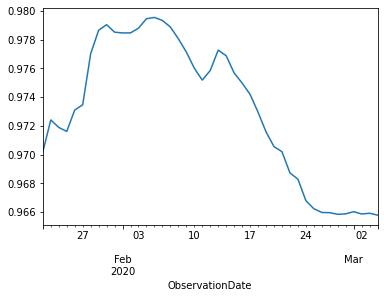

In [11]:
# key debe ser el tipo de dato datatime
sr = df_cum.groupby(pd.Grouper(key='ObservationDate', freq = '1D'))['rate'].mean()
sr.plot()

In [23]:
rate_by_day = df_cum.groupby(pd.Grouper(key='ObservationDate', freq = '1D'))[['rate']].mean()

In [26]:
rate_by_day= rate_by_day.reset_index()

In [27]:
rate_by_day.columns

Index(['ObservationDate', 'rate'], dtype='object')

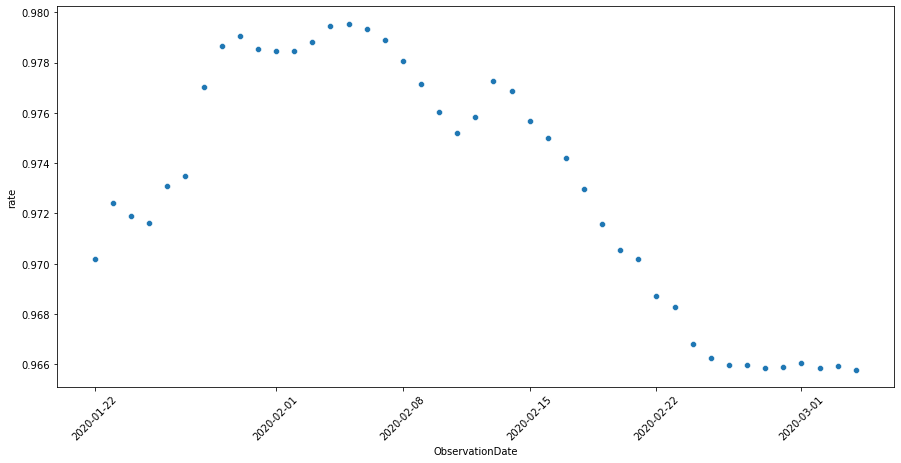

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(15,7))
sns.scatterplot(x='ObservationDate', y='rate', data=rate_by_day)
plt.xticks(rotation=45)
plt.show()

# Rolling para definir intervalos de tiempos

<AxesSubplot:xlabel='ObservationDate'>

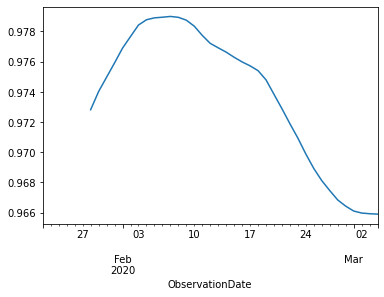

In [31]:
sr.rolling(window=7).mean().plot()

<AxesSubplot:xlabel='ObservationDate'>

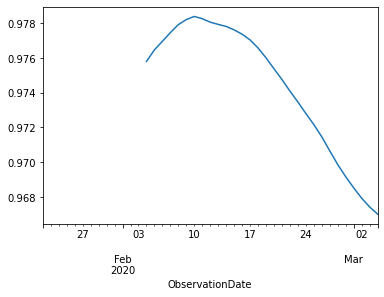

In [32]:
sr.rolling(window=14).mean().plot()

### mientras se tenga un window con un mayor valor se ira suaviando las curvas

<AxesSubplot:xlabel='ObservationDate'>

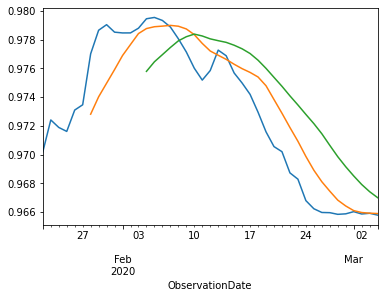

In [33]:
sr.plot()
# roling permite hacer promedio con unas ventanas de frecuencias de tiempo
sr.rolling(window=7).mean().plot()
sr.rolling(window=14).mean().plot()

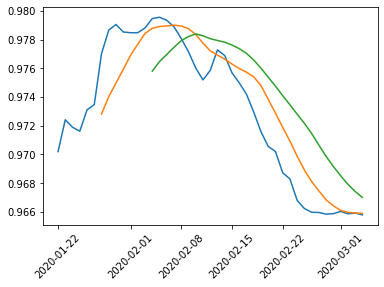

In [35]:
import matplotlib.pyplot as plt

plt.plot(sr)
plt.plot(sr.rolling(window = 7).mean())
plt.plot(sr.rolling(window = 14).mean())

plt.xticks(rotation = '45')
plt.show()

In [36]:
import numpy as np

<AxesSubplot:xlabel='ObservationDate'>

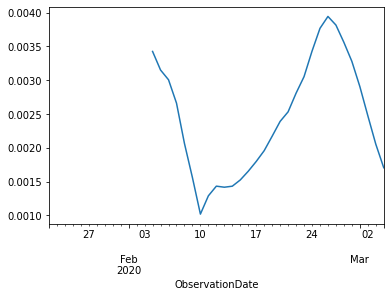

In [38]:
sr.rolling(window=14).std().plot()

<AxesSubplot:xlabel='ObservationDate'>

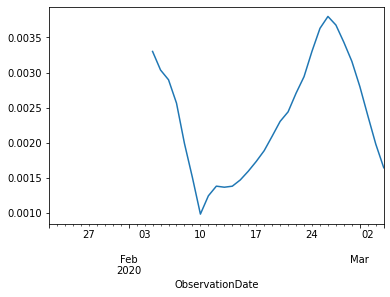

In [37]:
sr.rolling(window=14).apply(lambda x: np.std(x)).plot()